In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# 1
dataframe = pd.read_csv('medical_examination.csv')
df = pd.DataFrame(dataframe)

In [54]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [55]:

# 2
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)


In [56]:
# 3 '0' = Good, '1' = Bad
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [58]:
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
df_cd_1= df_cat[df_cat['cardio']==1]
df_cd_1.tail()

,cardio,variable,value
419993,1,overweight,0
419994,1,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


<Axes: xlabel='variable', ylabel='count'>

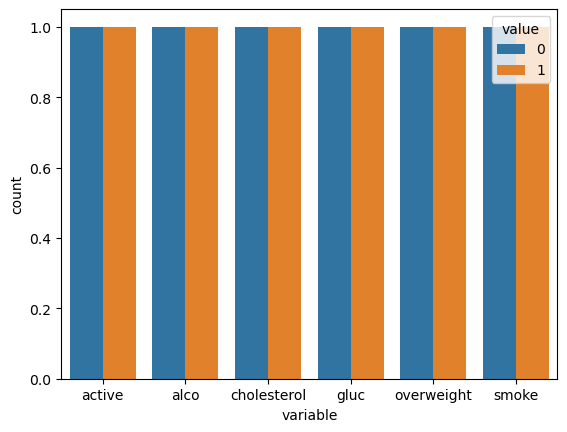

In [61]:
df_cd_1 = df_cd_1.groupby(['cardio', 'variable','value'], as_index=False).size().reset_index()
sns.countplot(df_cd_1, x = 'variable', hue = 'value')


In [ ]:

# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])


    # 6
    df_cat = df[(df_cat['cardio'] == 1)]
    sns.barplot(df_cat, x = 'variable', y = 'value')

    # 7
    df_cat = df[(df_cat['cardio'] == 0)]


    # 8
    fig = None


    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = None

    # 12
    corr = None

    # 13
    mask = None



    # 14
    fig, ax = None

    # 15



    # 16
    fig.savefig('heatmap.png')
    return fig
